In [51]:
import pandas as pd
import numpy as np
import os
dataset_path = "/kaggle/input/corona-virus-report"
csv_files = [f for f in os.listdir(dataset_path) if f.endswith(".csv")]

# CSV dosyalarını birer DataFrame olarak yükleyip sözlükte saklayın
dataframes = {file.replace(".csv", ""): pd.read_csv(f"{dataset_path}/{file}") for file in csv_files}

In [52]:
file_path = "/kaggle/input/corona-virus-report/country_wise_latest.csv"
# Veri setini yükleyin
df = pd.read_csv(file_path)

# Veri setinin genel yapısı
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [53]:
df.describe()

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


Pandas ile Giriş: Veri çerçevesinin genel bilgilerini gösterin (df.info(), df.describe()).

In [54]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05.

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing


In [55]:
# Eksik değerler ekleme
df_with_missing = add_random_missing_values(df, missing_rate=0.05)

# Sonuçları kontrol etme
df_with_missing.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,5.04,35526.0,737.0,2.07,Eastern Mediterranean
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,NaN,2.95,56.25,5.25,4171.0,709.0,17.00,Europe
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,6.17,23691.0,4282.0,18.07,Africa
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,6.48,884.0,23.0,2.60,Europe
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,16.94,NaN,NaN,26.84,Africa


Country/Region            12
Confirmed                  6
Deaths                     9
Recovered                 10
Active                     7
New cases                  5
New deaths                 7
New recovered              9
Deaths / 100 Cases        10
Recovered / 100 Cases     12
Deaths / 100 Recovered    12
Confirmed last week        7
1 week change             13
1 week % increase          4
WHO Region                13
dtype: int64


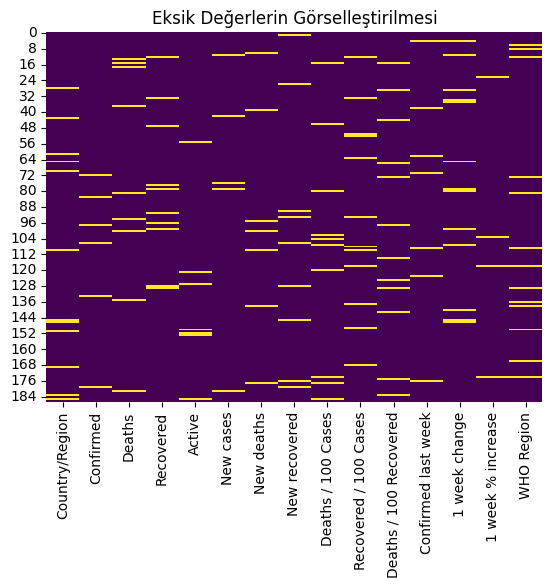

In [56]:
# Eksik değerlerin özetini görüntüleme
print(df_with_missing.isnull().sum())

# Eksik değerlerin görselleştirilmesi
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_with_missing.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Değerlerin Görselleştirilmesi")
plt.show()


In [57]:
# Eksik değerleri doldurma örneği (ileri doldurma yöntemi)
df_cleaned = df_with_missing.fillna(method="ffill")

# Eksik değerlerden sonra ilk birkaç satırı kontrol etme
df_cleaned.head()

/tmp/ipykernel_30/3106544565.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_with_missing.fillna(method="ffill")


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263.0,1269.0,25198.0,9796.0,106.0,10.0,18.0,3.50,69.49,5.04,35526.0,737.0,2.07,Eastern Mediterranean
1,Albania,4880.0,144.0,2745.0,1991.0,117.0,6.0,18.0,2.95,56.25,5.25,4171.0,709.0,17.00,Europe
2,Algeria,27973.0,1163.0,18837.0,7973.0,616.0,8.0,749.0,4.16,67.34,6.17,23691.0,4282.0,18.07,Africa
3,Andorra,907.0,52.0,803.0,52.0,10.0,0.0,0.0,5.73,88.53,6.48,884.0,23.0,2.60,Europe
4,Angola,950.0,41.0,242.0,667.0,18.0,1.0,0.0,4.32,25.47,16.94,884.0,23.0,26.84,Africa


In [58]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [59]:
# Sütun adlarını temizleme (boşlukları kaldırma)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Yeniden sütun adlarını kontrol etme
print(df.columns)


Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New_cases', 'New_deaths', 'New_recovered', 'Deaths_/_100_Cases',
       'Recovered_/_100_Cases', 'Deaths_/_100_Recovered',
       'Confirmed_last_week', '1_week_change', '1_week_%_increase',
       'WHO_Region'],
      dtype='object')


## Veri Görselleştirme
Bu adımda verinin dağılımını ve ilişkilerini görselleştiriyoruz.

Görselleştirme: Matplotlib veya Seaborn ile:
* Histogram
* Boxplot
* Heatmap (korelasyon için)çin)

#  Keşifsel Veri Analizi (EDA)

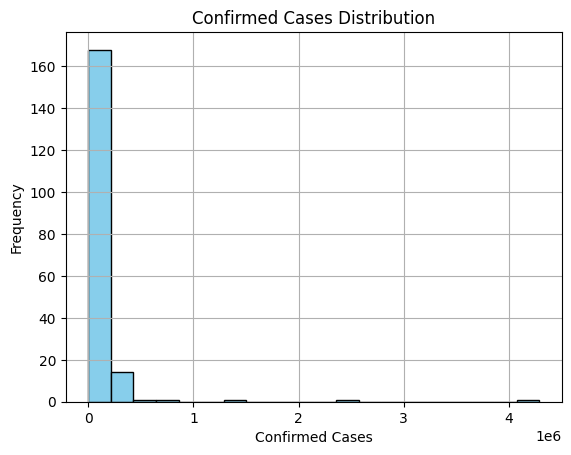

In [60]:
# 'Confirmed' (toplam vaka) sütunu için histogram
df_cleaned["Confirmed"].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Confirmed Cases Distribution")
plt.xlabel("Confirmed Cases")
plt.ylabel("Frequency")
plt.show()

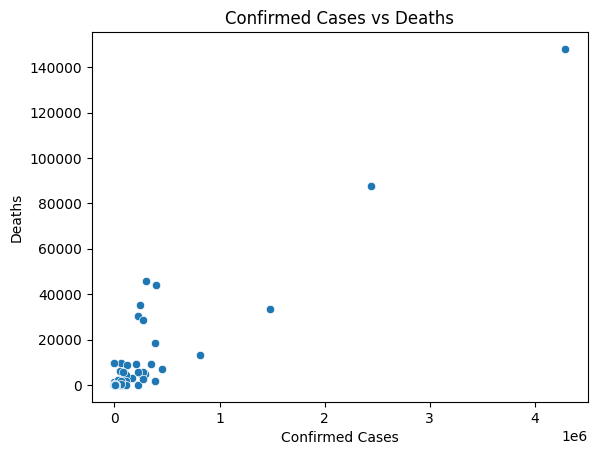

In [61]:
# Vaka sayıları (Confirmed) ile ölüm sayıları (Deaths) arasındaki ilişkiyi scatter plot ile inceleyelim
sns.scatterplot(data=df_cleaned, x="Confirmed", y="Deaths")
plt.title("Confirmed Cases vs Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.show()

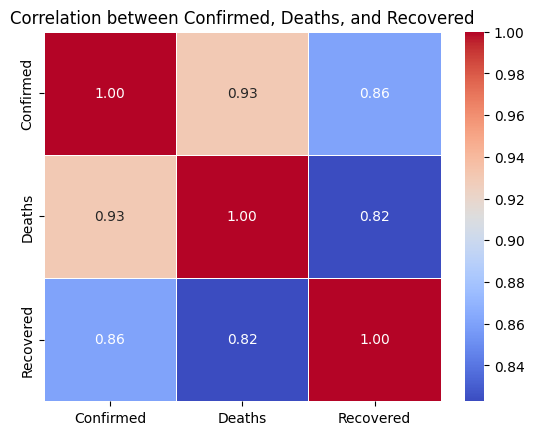

In [62]:
# Korelasyon matrisi
corr = df_cleaned[["Confirmed", "Deaths", "Recovered"]].corr()

# Korelasyon matrisini görselleştirme
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Confirmed, Deaths, and Recovered")
plt.show()

### Korelasyon Analizi
Korelasyon haritası, veri setindeki değişkenlerin birbiriyle olan ilişkisini anlamamıza yardımcı olur. Örneğin, pozitif değerler bir değişkenin diğerini artırdığını, negatif değerler ise ters ilişkili olduğunu gösterir Deaths, ve Recovered sütunları arasındaki yüksek korelasyon, bu değişkenlerin birbirleriyle oldukça güçlü bir şekilde ilişkili olduğunu gösterir.


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


/tmp/ipykernel_30/2970085014.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method="ffill")


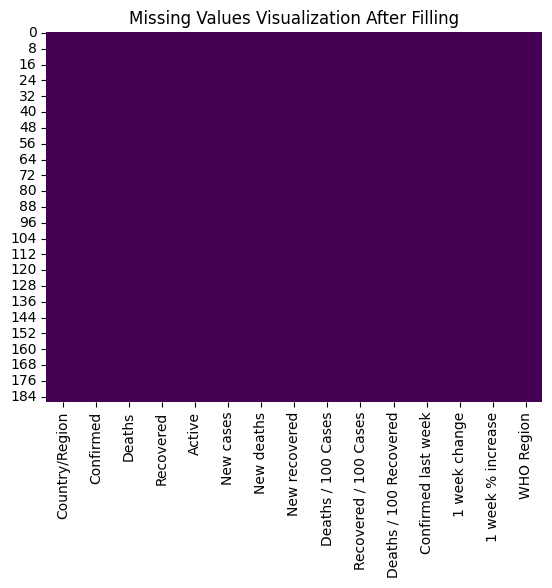

In [63]:
# Eksik değerleri kontrol etme
print(df_cleaned.isnull().sum())

# Eksik değerleri ileri doldurma (forward fill)
df_cleaned = df_cleaned.fillna(method="ffill")

# Eksik değerlerin görselleştirilmesi
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Visualization After Filling")
plt.show()


/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


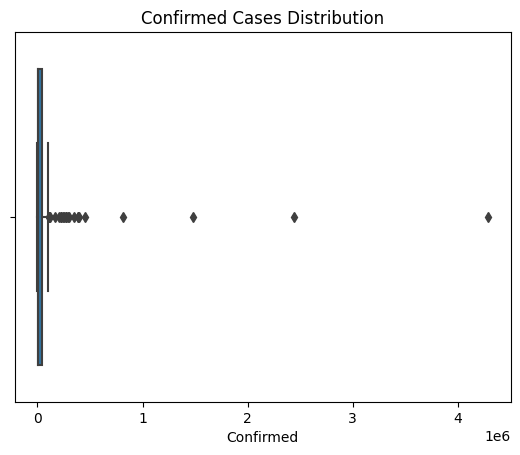

In [64]:
# Temel istatistiksel ölçümleri hesaplama
df_cleaned.describe()

# "Confirmed" sütunundaki dağılımı görselleştirme
sns.boxplot(x=df_cleaned["Confirmed"])
plt.title("Confirmed Cases Distribution")
plt.show()


 Verilerin Dağılımını Anlamak İçin İstatistiksel Ölçümler
İstatistiksel ölçümler, veri setinin genel yapısını anlamak için çok önemlidir. Örneğin:

Ortalama, Medyan, Standart Sapma
Desenlerin ve Aykırı Değerlerin Görselleştirilmesi


# Zaman Serisi Analizi

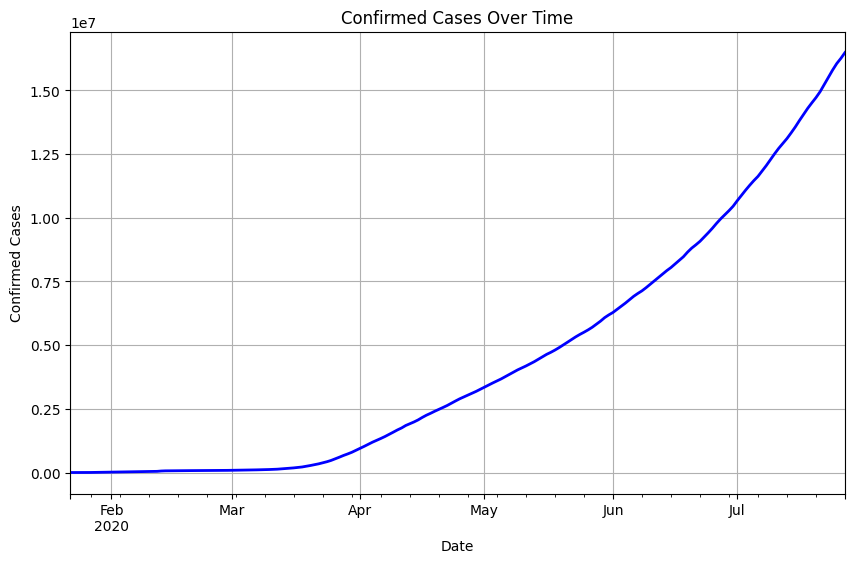

In [65]:
# Veri setini yükleme
df_day_wise = pd.read_csv("/kaggle/input/corona-virus-report/day_wise.csv")

# Tarih sütununu datetime formatına dönüştürme
df_day_wise['Date'] = pd.to_datetime(df_day_wise['Date'])

# Tarih sütununu indeks olarak ayarlama
df_day_wise.set_index('Date', inplace=True)

# 'Confirmed' sütununu kullanarak zaman serisi analizi
df_day_wise['Confirmed'].plot(figsize=(10, 6), color='blue', linewidth=2)

# Grafik başlığı ve etiketler
plt.title("Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


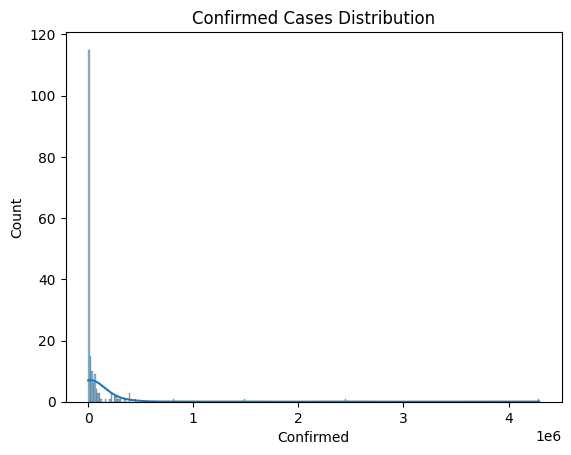

In [66]:
sns.histplot(df_cleaned['Confirmed'], kde=True)
plt.title("Confirmed Cases Distribution")
plt.show()

burada confirmed değişkeninin standart sapmasını görselleşdirdim ve görünen o ki en yüksek 20 sayısı ve gitdikce daha da küçük sayılara ulaşmışdır

# Feature Selection& Feature Engineering

In [67]:
df_cleaned['Population'] = 1_000_000

# Yeni vaka oranı sütunu oluşturma
df_cleaned['Cases per Million'] = df_cleaned['Confirmed'] / df_cleaned['Population'] * 1_000_000

df_cleaned[['Confirmed', 'Population', 'Cases per Million']].head()

,Confirmed,Population,Cases per Million
0,36263.0,1000000,36263.0
1,4880.0,1000000,4880.0
2,27973.0,1000000,27973.0
3,907.0,1000000,907.0
4,950.0,1000000,950.0


In [68]:
df_cleaned['Recovery Rate'] = df_cleaned['Recovered'] / df_cleaned['Confirmed'] * 100 #İyileşme Oranı: Toplam iyileşen vaka sayısının, toplam doğrulanmış vaka sayısına oranı.

In [69]:
df_cleaned['Death Rate'] = df_cleaned['Deaths'] / df_cleaned['Confirmed'] * 100 #Ölüm Oranı: Toplam ölüm sayısının, toplam doğrulanmış vaka sayısına oranı.

In [70]:
df_cleaned['Recovered per 100 Cases'] = df_cleaned['Recovered'] / df_cleaned['Confirmed'] * 100 #İyileşen Vaka Oranı: Her 100 doğrulanmış vakaya düşen iyileşen vaka sayısı.

In [71]:
df_cleaned['Recovered per 100 Cases'] = df_cleaned['Recovered'] / df_cleaned['Confirmed'] * 100 #Aktif Vaka Sayısı (Active Cases)

In [72]:
df_cleaned['Cases Growth Rate'] = df_cleaned['1 week % increase'] #Vaka Değişim Oranı: Bir haftalık değişim oranını gösterebilir.

In [73]:
df_cleaned['New Cases per Million'] = df_cleaned['New cases'] / df_cleaned['Population'] * 1_000_000 #Yeni Vaka Oranı:

In [74]:
df_cleaned['New Deaths per Million'] = df_cleaned['New deaths'] / df_cleaned['Population'] * 1_000_000 #Yeni Ölüm Oranı:

Hızlı Vaka Artışı (Yeni Vaka ve Ölüm Oranı) Yeni vaka, ölüm ve iyileşme oranlarını da incelemek, ülkelerin durumu hakkında bilgi verebilir

Problem: Hükümetler, COVID-19’un gelecekteki artışını tahmin ederek, karantina, sosyal mesafe veya sağlık tedbirlerinin etkili bir şekilde uygulanmasını sağlayabilir.
Çözüm: Makine öğrenmesi modelleri kullanılarak, COVID-19 vaka artışları ve ölüm oranları gibi verilerden gelecekteki tahminler yapılabilir. Örneğin, XGBoost gibi güçlü algoritmalar, geçmiş verilerden gelecekteki vaka sayısını tahmin ederek sağlık hizmetlerinin kapasite yönetimini optimize edebilir.
Amaç: Bu tür bir model, karar vericilere vaka artışlarına göre kaynak tahsisi yapabilme yeteneği sunar. Yüksek vaka artışı tahmin edilen bölgelerde sağlık kapasitesinin arttırılması sağlanabilir.

#  Model Seçimi ve Uygulama

Doğrusal Regresyon (Linear Regression):

Kullanım Durumu: Basit ilişkiler için uygundur (örneğin, vaka sayıları ile nüfus arasında doğrusal bir ilişki olduğunu varsaymak).
Avantajlar: Hızlı ve kolay uygulanabilir, ancak doğrusal ilişkilerde daha iyi sonuçlar verir.
Random Forest (Rastgele Orman):

Kullanım Durumu: Daha karmaşık ilişkilerde ve çoklu özelliklerin etkilerini dikkate alır.
Avantajlar: Daha esnek ve güçlüdür. Verilerdeki doğrusal olmayan ilişkileri iyi modelleyebilir.
XGBoost (Gradient Boosting):

Kullanım Durumu: Büyük veri setleri için güçlü bir modeldir. İleri düzey özellik mühendisliği gerektirebilir.
Avantajlar: Çoğunlukla yüksek doğruluk sağlar ve çok büyük veri setlerinde iyi performans gösterir.
Zaman Serisi Modelleri (ARIMA veya LSTM):

Kullanım Durumu: COVID-19 gibi zaman içinde artan veri setlerinde kullanılabilir.
Avantajlar: Gelecekteki vaka artışını tahmin etmek için zaman serisi verilerini analiz edebilir.
Modelin Seçimi:
Eğer COVID-19 verileri zamanla değişen bir yapıya sahipse, yani vaka sayılarının günlük veya haftalık bazda artış gösteriyorsa, zaman serisi analizine yönelmek faydalı olabilir.

Sonuçlar:
COVID-19 Vaka Tahminleri: Modeliniz, vaka artışı ve ölüm oranlarının tahmin edilmesi konusunda sağlık kuruluşlarına ve hükümetlere yardımcı olabilir. Bu tahminler, sağlık altyapısının planlanması ve kaynakların yönetilmesinde kullanılabilir.
Model Performansı: Doğrusal regresyon, basit ilişkiler için etkili olabilir, ancak karmaşık ilişkilerde Random Forest veya XGBoost modelleri daha iyi sonuçlar verebilir.